In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

In [2]:
data = pd.read_csv('./csv/multi_classification_data.csv')

In [22]:
# Splitting the data into features and targets
X = data.iloc[:, :-7]
y_with_other = data.iloc[:, -7:]
y_without_other = data.iloc[:, -8:-1]

# Splitting the data into train and test sets
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X, y_with_other, test_size=0.2, random_state=42)
X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X, y_without_other, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
clf_with = GradientBoostingClassifier(random_state=42)
clf_without = GradientBoostingClassifier(random_state=42)

# Train the models
clf_with.fit(X_train_with, y_train_with.idxmax(axis=1))
clf_without.fit(X_train_without, y_train_without.idxmax(axis=1))

# Make predictions
y_pred_with = clf_with.predict(X_test_with)
y_pred_without = clf_without.predict(X_test_without)

# Calculate the classification reports
report_with = classification_report(y_test_with.idxmax(axis=1), y_pred_with)
report_without = classification_report(y_test_without.idxmax(axis=1), y_pred_without)

In [23]:
# Print the classification reports
print('With other defaults:\n', report_with)
print('Without other defaults:\n', report_without)

With other defaults:
               precision    recall  f1-score   support

       Bumps       0.62      0.64      0.63        72
   Dirtiness       0.60      0.75      0.67         8
    K_Scatch       0.95      0.95      0.95        83
Other_Faults       0.74      0.76      0.75       143
      Pastry       0.68      0.59      0.63        29
      Stains       1.00      0.92      0.96        13
   Z_Scratch       0.97      0.90      0.94        41

    accuracy                           0.79       389
   macro avg       0.80      0.79      0.79       389
weighted avg       0.79      0.79      0.79       389

Without other defaults:
                 precision    recall  f1-score   support

         Bumps       0.61      0.64      0.62        70
     Dirtiness       0.60      0.75      0.67         8
      K_Scatch       0.85      0.85      0.85        13
        Pastry       0.76      0.59      0.67        27
SigmoidOfAreas       0.85      0.87      0.86       223
        Stains     

GradientBoostingClassifier의 경우 튜닝을 고려할 수 있는 몇 가지 주요 하이퍼파라미터가 있습니다:  

1. n_estimators: 수행할 부스팅 단계의 수입니다. 그라디언트 부스팅은 과적합에 상당히 강하므로 일반적으로 숫자가 많을수록 성능이 향상됩니다.  
2. learning_rate: 각 트리가 최종 결과에 미치는 영향을 결정합니다. GBM은 각 트리의 출력을 사용하여 업데이트되는 초기 추정치로 시작하여 작동합니다. 학습 매개변수는 이러한 추정치 변화의 크기를 제어합니다.
3. 최대_뎁스: 개별 회귀 추정기의 최대 깊이입니다. 최대 깊이는 트리의 노드 수를 제한합니다.  
4. MIN_SAMPS_SPLIT: 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.  
5. MIN_SAMPS_LEAF: 리프 노드에 필요한 최소 샘플 수입니다.  
여기서는 이러한 하이퍼파라미터를 조정하기 위해 sklearn.model_selection의 GridSearchCV를 사용하겠습니다. GridSearchCV는 하이퍼파라미터 튜닝을 수행하는 데 사용되는 메서드입니다. 이 방법은 지정한 다양한 매개 변수에 대해 모델을 여러 번 훈련한 다음 가장 성능이 좋은 매개 변수를 반환하는 방식으로 작동합니다.

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# Define the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Define a smaller parameter distribution
param_dist_small = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Instantiate the randomized search model with smaller distribution
rand_search_small = RandomizedSearchCV(estimator=gb, param_distributions=param_dist_small, 
                                       n_iter=9, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search to the data
rand_search_small.fit(X_train_without, y_train_without.idxmax(axis=1))

rand_search_small.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'n_estimators': 150, 'learning_rate': 0.1}

위 하이퍼파라미터를 사용하여 그라디언트 부스팅으로 훈련하고 성능을 평가

In [38]:
data = pd.read_csv('./csv/multi_classification_data.csv')

# Define the feature set 'X' and the target set 'y'
X = data.iloc[:, :-7]
y = data.iloc[:, -7:]

# Define the target set without the 'Other_Faults' column
y_without_other = y.drop('Other_Faults', axis=1)

# Split the data without 'Other_Faults' into training and validation sets
X_train_without, X_val_without, y_train_without, y_val_without = train_test_split(
    X, y_without_other, test_size=0.2, random_state=42, stratify=y_without_other)

# Train the Gradient Boosting Classifier with the best hyperparameters
best_gb = GradientBoostingClassifier(n_estimators=140, learning_rate=0.3, random_state=42)
best_gb.fit(X_train_without, y_train_without.idxmax(axis=1))

# Predict the classes on validation data
y_pred_without_best_gb = best_gb.predict(X_val_without)

# Compute the classification report
classification_report_without_best_gb = classification_report(y_val_without.idxmax(axis=1), y_pred_without_best_gb)
print('result:\n', classification_report_without_best_gb)


result:
               precision    recall  f1-score   support

       Bumps       0.77      0.67      0.72        81
   Dirtiness       1.00      0.64      0.78        11
    K_Scatch       0.99      0.97      0.98        78
      Pastry       0.80      0.90      0.85       167
      Stains       1.00      0.93      0.96        14
   Z_Scratch       1.00      0.89      0.94        38

    accuracy                           0.86       389
   macro avg       0.93      0.83      0.87       389
weighted avg       0.87      0.86      0.86       389



위의 점수가 지금까지 내가 한 작업 중에서 가장 높은 점수임.  ((n_estimators=140, learning_rate=0.3 --> f1 : 0.86)  
아래 스무트 -> 그라디언트 부스팅  : 0.83  
     스무트 -> 다중 신경망 : 0.42 

돌려본 결과로는 머신러닝이 딥러닝보다 훨씬 성능이 높게 평가됨.

In [40]:
from imblearn.over_sampling import SMOTE

data = pd.read_csv('./csv/multi_classification_data.csv')

# Define the feature set 'X' and the target set 'y'
X = data.iloc[:, :-7]
y = data.iloc[:, -7:]

# Define the target set without the 'Other_Faults' column
y_without_other = y.drop('Other_Faults', axis=1)

# Convert one-hot encoded target to labels
y_label = y_without_other.idxmax(axis=1)  # Get column name (label) of max value in each row

# Split the data without 'Other_Faults' into training and validation sets
X_train_without, X_val_without, y_train_without_label, y_val_without_label = train_test_split(
    X, y_label, test_size=0.2, random_state=42, stratify=y_label)

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Oversample the training dataset
X_train_res, y_train_res = smote.fit_resample(X_train_without, y_train_without_label)

# Train the Gradient Boosting Classifier with the best hyperparameters
best_gb = GradientBoostingClassifier(n_estimators=140, learning_rate=0.3, random_state=42)
best_gb.fit(X_train_res, y_train_res)

# Predict the classes on validation data
y_pred_without_best_gb = best_gb.predict(X_val_without)

# Compute the classification report
classification_report_without_best_gb = classification_report(y_val_without_label, y_pred_without_best_gb)

print('result:\n', classification_report_without_best_gb)

result:
               precision    recall  f1-score   support

       Bumps       0.67      0.72      0.69        81
   Dirtiness       0.91      0.91      0.91        11
    K_Scatch       0.95      0.90      0.92        78
      Pastry       0.82      0.80      0.81       167
      Stains       0.93      1.00      0.97        14
   Z_Scratch       0.92      0.92      0.92        38

    accuracy                           0.83       389
   macro avg       0.87      0.87      0.87       389
weighted avg       0.83      0.83      0.83       389



In [21]:
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.python.keras import layers, models, regularizers, optimizers, callbacks
from keras_tuner import RandomSearch
import tensorflow as tf
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [8]:
data = pd.read_csv('./csv/multi_classification_data.csv')

In [9]:

# Define the feature set 'X' and the target set 'y'
X = data.iloc[:, :-7]
y = data.iloc[:, -7:]

# Convert one-hot encoded target to labels
y_label = y.idxmax(axis=1)  # Get column name (label) of max value in each row

# Create a SMOTE object
smote = SMOTE()

# Oversample the dataset
X_res, y_res_label = smote.fit_resample(X, y_label)

# Convert labels back to one-hot encoding
label_encoder = LabelEncoder()
y_res_label_encoded = label_encoder.fit_transform(y_res_label)
y_res = pd.get_dummies(y_res_label_encoded)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Checking the shape of the training and validation sets
X_train.shape, y_train.shape, X_val.shape, y_val.shape


((3768, 27), (3768, 7), (943, 27), (943, 7))

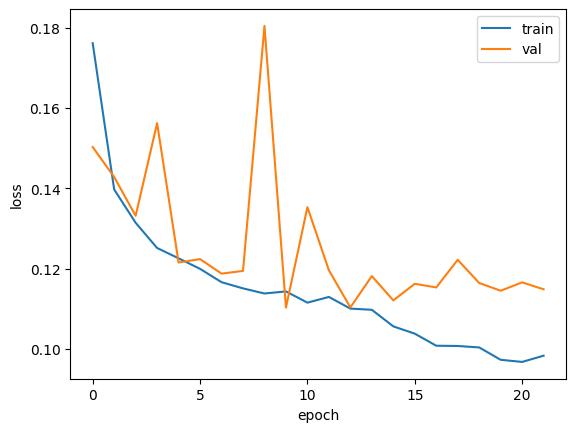

In [10]:
# Convert the pandas dataframes into tensorflow datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
valid_ds = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))

# Shuffle and batch the datasets
train_ds = train_ds.cache().shuffle(1000).batch(32)
valid_ds = valid_ds.cache().batch(32)

# Define the keras model
l1 = tf.keras.regularizers.l1(1e-4)
nn = keras.models.Sequential([
    keras.layers.Dense(64, input_shape=[X_train.shape[1]],
                       kernel_regularizer=l1),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(32, kernel_regularizer=l1),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(16, kernel_regularizer=l1),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(8, kernel_regularizer=l1),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dense(y_train.shape[1]), # Adjusted here
])

# Compile the model
nn.compile(optimizer=keras.optimizers.Adam(0.01),
           loss='mse')

# Define callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.5, patience=6,
                                                 verbose=0, mode='auto')
e_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=12,
                                          restore_best_weights=True)

# Train the model
hist = nn.fit(train_ds,
              validation_data=valid_ds,
              epochs=200,
              callbacks=[reduce_lr, e_stop],
              verbose=0)

# Plot the training and validation loss
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
# Make predictions on the validation set
y_val_pred = nn.predict(X_val)

# Convert the predictions and true values to integer type
y_val_pred = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val.values, axis=1)

# Define the target names
target_names = label_encoder.inverse_transform(np.arange(y_train.shape[1]))


# Generate classification report
classification_rep = classification_report(y_val_true, y_val_pred, target_names=target_names)

print(classification_rep)

30/30 [==============================] - 0s 500us/step
              precision    recall  f1-score   support

       Bumps       0.38      0.28      0.33       124
   Dirtiness       0.39      0.73      0.51       144
    K_Scatch       0.83      0.83      0.83       126
Other_Faults       0.20      0.07      0.11       134
      Pastry       0.00      0.00      0.00       139
      Stains       0.39      0.92      0.55       134
   Z_Scratch       0.19      0.12      0.15       142

    accuracy                           0.42       943
   macro avg       0.34      0.42      0.35       943
weighted avg       0.33      0.42      0.35       943



c:\ProgramData\anaconda3\envs\TeamProject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\TeamProject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\TeamProject\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


다음은 이상치를 제거하고 모델 학습

In [3]:
# Get descriptive statistics for each column
desc_stats = data.describe()

# Display the descriptive statistics
desc_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


"Pixels_Areas" 열을 살펴보면, 75% 이상의 데이터가 822 이하이지만 최대값은 152655로, 이는 이상치일 가능성이 높습니다. 비슷하게 "X_Perimeter", "Y_Perimeter", "Sum_of_Luminosity" 등의 열도 이상치가 있을 가능성이 있습니다.



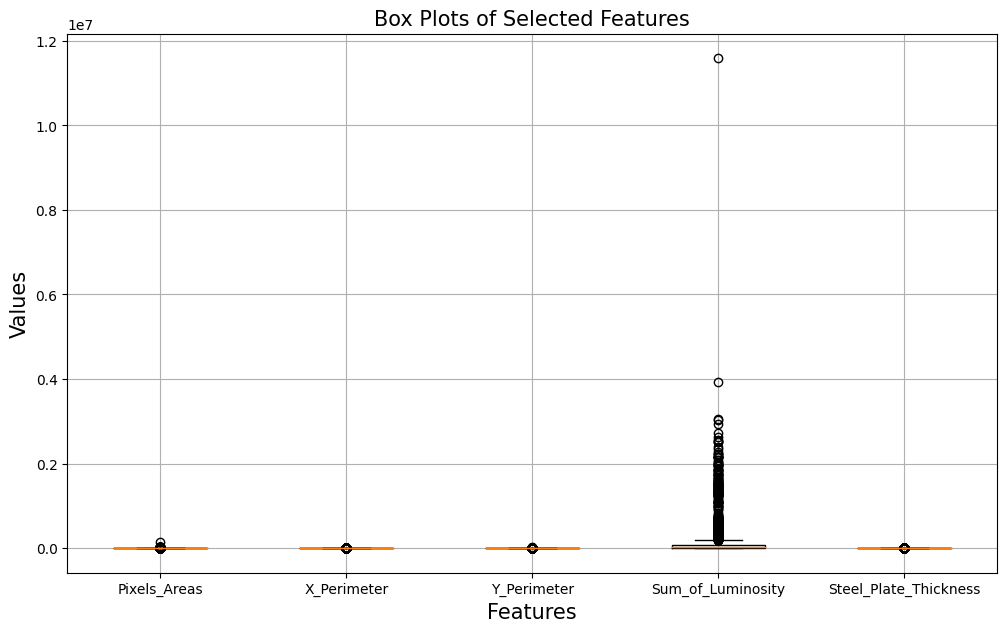

In [4]:
import matplotlib.pyplot as plt

# Selecting a subset of columns for boxplot visualization for clarity
subset_columns = ['Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Steel_Plate_Thickness']

# Create a figure instance and a subplot
fig, ax = plt.subplots(figsize=(12, 7))

# Box plot
ax.boxplot([data[col] for col in subset_columns])

# Changing x-axis labels to corresponding column names
ax.set_xticklabels(subset_columns)

# Title and labels
plt.title('Box Plots of Selected Features', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.grid(True)
plt.show()

위의 상자 그림에서, "Pixels_Areas", "X_Perimeter", "Y_Perimeter", "Sum_of_Luminosity"의 경우 값의 범위가 넓게 퍼져 있으며, 이는 이상치가 존재할 가능성을 보여줍니다. 특히 "Pixels_Areas", "X_Perimeter", "Y_Perimeter", "Sum_of_Luminosity"의 경우 많은 수의 이상치가 있는 것으로 보입니다.

In [5]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
        df = df.loc[filter]  

    return df

# Remove outliers in the data
data_no_outliers = remove_outliers_iqr(data, subset_columns)

# Display the first few rows of the data
data_no_outliers.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
7,190,200,210936,210956,132,11,20,20007,124,172,...,0.5000,0.1841,0.3359,1,0,0,0,0,0,0
8,330,343,429227,429253,264,15,26,29748,53,148,...,0.5000,-0.1197,0.5593,1,0,0,0,0,0,0


In [6]:
# Check the shape of the data after removing outliers
data_no_outliers.shape

(1125, 34)

이상치를 제거한 결과 데이터 행의 수가 1941개에서 1125개로 줄었습니다.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Define the feature set 'X' and the target set 'y'
X = data_no_outliers.iloc[:, :-7]
y = data_no_outliers.iloc[:, -7:]

# Define the target set without the 'Other_Faults' column
y_without_other = y.drop('Other_Faults', axis=1)

# Split the data without 'Other_Faults' into training and validation sets
X_train_without, X_val_without, y_train_without, y_val_without = train_test_split(
    X, y_without_other, test_size=0.2, random_state=42, stratify=y_without_other)

# Train the Gradient Boosting Classifier with the best hyperparameters
best_gb = GradientBoostingClassifier(n_estimators=140, learning_rate=0.3, random_state=42)
best_gb.fit(X_train_without, y_train_without.idxmax(axis=1))

# Predict the classes on validation data
y_pred_without_best_gb = best_gb.predict(X_val_without)

# Compute the classification report
classification_report_without_best_gb = classification_report(y_val_without.idxmax(axis=1), y_pred_without_best_gb)

print(classification_report_without_best_gb)


              precision    recall  f1-score   support

       Bumps       0.67      0.58      0.62        67
   Dirtiness       0.83      0.71      0.77         7
    K_Scatch       1.00      0.70      0.82        10
      Pastry       0.70      0.79      0.75       102
      Stains       0.92      0.86      0.89        14
   Z_Scratch       0.92      0.96      0.94        25

    accuracy                           0.75       225
   macro avg       0.84      0.77      0.80       225
weighted avg       0.75      0.75      0.74       225



점수는 0.86에서 0.75로 줄었음. 